In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
#
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

figures_path = '/Users/earl/Dropbox/IMOS/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

data_path = '/Users/earl/IMOS/'

years = arange(1993,2017,1)

/Users/earl/IMOS
Figures will be saved in: /Users/earl/Dropbox/IMOS/p02_SST_01



In [4]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:53201' processes=4 cores=4>
CPU times: user 521 ms, sys: 274 ms, total: 795 ms
Wall time: 3.66 s


In [7]:
from scipy import interpolate

xu_ocean = tau_x.xu_ocean + 360
yu_ocean = tau_x.yu_ocean
lon_unique = uas_10m.longitude
lat_unique = uas_10m.latitude

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

tauuo_anom_unique = []
    
tauuo_lat_N_idx = find_nearest_index(yu_ocean, lat_N).values
tauuo_lat_S_idx = find_nearest_index(yu_ocean, lat_S).values
tauuo_lon_W_idx = find_nearest_index(xu_ocean, lon_W).values
tauuo_lon_E_idx = find_nearest_index(xu_ocean, lon_E).values

tauuo_grid_lon_now, tauuo_grid_lat_now = np.meshgrid(
    xu_ocean[tauuo_lon_W_idx:tauuo_lon_E_idx], 
    yu_ocean[tauuo_lat_S_idx:tauuo_lat_N_idx])
tauuo_lon_flat = np.transpose(tauuo_grid_lon_now.flatten('F'))
tauuo_lat_flat = tauuo_grid_lat_now.flatten('F')
tauuo_flat_list = [tauuo_lon_flat, tauuo_lat_flat]    
tauuo_grid_points = np.transpose(tauuo_flat_list)
tauuo_anom_now = tau_x[tauuo_lat_S_idx:tauuo_lat_N_idx,tauuo_lon_W_idx:tauuo_lon_E_idx]
tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('xu_ocean', 'yu_ocean'))
tauuo_anom_interp = interpolate.griddata(tauuo_grid_points, tauuo_anom_now_flatten, 
                                       (grid_lon_unique, grid_lat_unique), 
                                       method='linear')


uas_10m = uas_10m.where(np.isfinite(tauuo_anom_interp))

In [7]:
sea_surface_temperature_path = data_path + 'IMOS_aggregation_20181023T031550Z.nc'

latS = -70
latN = 20
lonW = 90
lonE = 180


sea_surface_temperature = xr.open_dataset(
sea_surface_temperature_path).sea_surface_temperature.\
sel(time=slice('1993-01-01', '1994-01-01')).\
sel(lon=arange(lonW,lonE,0.1), method='nearest').\
sel(lat=arange(latS,latN,0.1), method='nearest').\
groupby('time.year').\
mean(dim='time')

# sea_surface_temperature = sea_surface_temperature.assign_coords(time=years)

In [11]:
print(sea_surface_temperature)

sea_surface_temperature.lat.values

<xarray.DataArray 'sea_surface_temperature' (year: 1, lat: 901, lon: 901)>
array([[[273.81635, 273.81635, ..., 274.4801 , 274.4801 ],
        [273.81635, 273.81635, ..., 274.4801 , 274.4801 ],
        ...,
        [296.58835, 296.58835, ..., 297.71692, 297.71692],
        [296.58835, 296.58835, ..., 297.71692, 297.71692]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -59.99 -59.99 -59.99 -59.99 -59.99 -59.99 -59.99 ...
  * lon      (lon) float32 100.01 100.01 100.01 100.01 100.01 100.01 100.01 ...
  * year     (year) int64 1993


array([-59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99, -59.99,
       -59.99, -59.99, -59.99, -59.99, -59.99, -59.91, -59.79, -59.71,
       -59.59, -59.51, -59.41, -59.29, -59.21, -59.09, -59.01, -58.91,
      

In [9]:
%%time

longitude = uas_10m.longitude
latitude = uas_10m.latitude
time = years
uas_10m_anom = \
uas_10m - uas_10m.mean(dim='time')
uas_10m_slopes = xr.DataArray(
    np.zeros([latitude.shape[0], longitude.shape[0]]), dims=(
    'latitude', 'longitude'),
    coords=[latitude, longitude], name='uas_10m')
for iid, i in enumerate(latitude):
    for jid, j in enumerate(longitude):        
        uas_10m_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(time, uas_10m_anom.sel(longitude=j, latitude=i))
    print('latitude ' + str(np.array(i)))
print(uas_10m_slopes)

lon = sea_surface_temperature.lon
lat = sea_surface_temperature.lat
time = years
sea_surface_temperature_anom = \
sea_surface_temperature - sea_surface_temperature.mean(dim='time')
sea_surface_temperature_slopes = xr.DataArray(
    np.zeros([lat.shape[0], lon.shape[0]]), dims=(
    'lat', 'lon'), 
    coords=[lat, lon], name='sea_surface_temperature')
for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):        
        sea_surface_temperature_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(time, sea_surface_temperature_anom.sel(lon=j, lat=i))
    print('lat ' + str(np.array(i)))
print(sea_surface_temperature_slopes)

LONGITUDE = GSLA.LONGITUDE
LATITUDE = GSLA.LATITUDE
TIME = years
GSLA_anom = GSLA - GSLA.mean(dim='TIME')
GSLA_slopes = xr.DataArray(
    np.zeros([LATITUDE.shape[0], LONGITUDE.shape[0]]), dims=(
    'LATITUDE', 'LONGITUDE'), 
    coords=[LATITUDE, LONGITUDE], name='GSLA')
for iid, i in enumerate(LATITUDE):
    for jid, j in enumerate(LONGITUDE):        
        GSLA_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(TIME, GSLA_anom.sel(LONGITUDE=j, LATITUDE=i))
    print('LATITUDE ' + str(np.array(i)))
print(GSLA_slopes)

latitude -59.8126726569327
latitude -59.2510528502565
latitude -58.6894329574061
latitude -58.1278129829758
latitude -57.5661929312427
latitude -57.0045728061936
latitude -56.4429526115493
latitude -55.8813323507866
latitude -55.3197120271579
latitude -54.7580916437092
latitude -54.1964712032965
latitude -53.6348507085999
latitude -53.0732301621377
latitude -52.5116095662779
latitude -51.9499889232498
latitude -51.3883682351539
latitude -50.826747503971
latitude -50.2651267315709
latitude -49.70350591972
latitude -49.1418850700887
latitude -48.5802641842574
latitude -48.018643263723
latitude -47.4570223099043
latitude -46.895401324147
latitude -46.3337803077285
latitude -45.7721592618623
latitude -45.2105381877018
latitude -44.6489170863444
latitude -44.0872959588346
latitude -43.5256748061674
latitude -42.9640536292911
latitude -42.4024324291106
latitude -41.840811206489
latitude -41.2791899622508
latitude -40.7175686971841
latitude -40.1559474120422
latitude -39.5943261075457
latitud

In [10]:
lon_SA = [112, 145]
lat_SA = [-41, -31]
sea_surface_temperature_anom_SA = sea_surface_temperature_anom.\
sel(lon=slice(lon_SA[0],lon_SA[1])).\
sel(lat=slice(lat_SA[0],lat_SA[1])).\
mean(dim='lon').\
mean(dim='lat')
sea_surface_temperature_anom_SA_slope, sea_surface_temperature_anom_SA_intrsct, _, _, _ = \
        stats.linregress(years, sea_surface_temperature_anom_SA)
uas_10m_anom_SA = uas_10m_anom.\
sel(longitude=slice(lon_SA[0],lon_SA[1])).\
sel(latitude=slice(lat_SA[0],lat_SA[1])).\
mean(dim='longitude').\
mean(dim='latitude')
uas_10m_anom_SA_slope, uas_10m_anom_SA_intrsct, _, _, _ = \
        stats.linregress(years, uas_10m_anom_SA)


lon_TS = [148, 157]
lat_TS = [-45, -32]
sea_surface_temperature_anom_TS = sea_surface_temperature_anom.\
sel(lon=slice(lon_TS[0],lon_TS[1])).\
sel(lat=slice(lat_TS[0],lat_TS[1])).\
mean(dim='lon').\
mean(dim='lat')
sea_surface_temperature_anom_TS_slope, sea_surface_temperature_anom_TS_intrsct, _, _, _ = \
        stats.linregress(years, sea_surface_temperature_anom_TS)
GSLA_anom_TS = GSLA_anom.\
sel(LONGITUDE=slice(lon_TS[0],lon_TS[1])).\
sel(LATITUDE=slice(lat_TS[0],lat_TS[1])).\
mean(dim='LONGITUDE').\
mean(dim='LATITUDE')
GSLA_anom_TS_slope, GSLA_anom_TS_intrsct, _, _, _ = \
        stats.linregress(years, GSLA_anom_TS)
    
print('OK')

OK


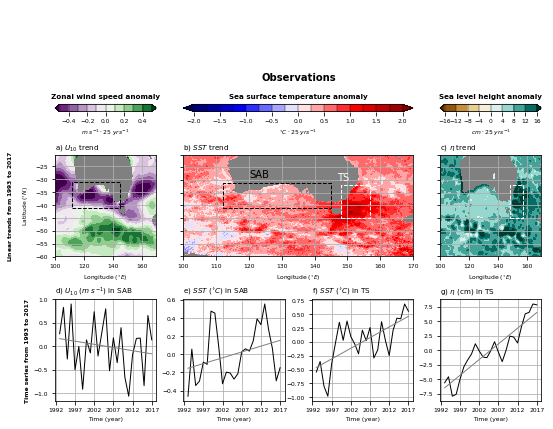

In [17]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
row = 6
col = 4
fig = plt.figure()
fig.set_size_inches(7.5,11.5)
matplotlib.rcParams.update({'font.size': 6}) 

fig.suptitle('Observations', x=0.54, y=0.92, fontsize=10, fontweight='bold')

##########################################################################################
ax = plt.subplot2grid((row, col), (1, 0), rowspan=1, colspan=1)
levels_tau_x_slope = arange(-0.5,0.5,0.1)
uas_10m_slopes_plot = uas_10m_slopes * 25
contf = uas_10m_slopes_plot.plot.contourf(
    add_colorbar=False, cmap='PRGn', levels=levels_tau_x_slope, extend='both')
levels = [-100, 0]
# uas_10m_mean = uas_10m.mean(dim='time')
# CS = uas_10m_mean.plot.contour(colors='k', levels=levels, linewidths=1)
plt.grid()
plt.xlabel('Longitude ($^{\circ}E$)')
plt.ylabel(r'$\bf{Linear\ trends\ from\ 1993\ to\ 2017}$' '\n\n' 'Latitude ($^{\circ}N$)')
plt.plot(
    [lon_SA[0], lon_SA[1], lon_SA[1], lon_SA[0], lon_SA[0]],
    [lat_SA[0], lat_SA[0], lat_SA[1], lat_SA[1], lat_SA[0]],
    color='k', linestyle='--', linewidth=1)
plt.gca().set_facecolor('gray')
plt.title(r'a) $U_{10}$ trend', loc='left')
ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size=0.1)
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
# cbar.set_ticks([-20, -0.1, 0, 0.1, 0.2])
cbar.set_label('$m\ s^{-1} \cdot 25\ yrs^{-1}$') 
ax.axis('off')
plt.title('Zonal wind speed anomaly', fontweight='bold')
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (1, 1), rowspan=1, colspan=2)
levels_temp_slope = np.arange(-2,2.25,0.25)
sea_surface_temperature_slopes_plot = sea_surface_temperature_slopes * 25
contf = sea_surface_temperature_slopes_plot.plot.contourf(
    add_colorbar=False, cmap='seismic', levels=levels_temp_slope, extend='both')
plt.grid()
plt.xlabel('Longitude ($^{\circ}E$)')
plt.ylabel('')
plt.gca().set_yticklabels('')
plt.plot(
    [lon_SA[0], lon_SA[1], lon_SA[1], lon_SA[0], lon_SA[0]],
    [lat_SA[0], lat_SA[0], lat_SA[1], lat_SA[1], lat_SA[0]],
    color='k', linestyle='--', linewidth=1)
plt.plot(
    [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]],
    color='white', linestyle='--', linewidth=1)
plt.text(120,-29,'SAB',color='k',fontsize=10)
plt.text(147,-30,'TS',color='white',fontsize=10)
plt.gca().set_facecolor('gray')
plt.title('b) $SST$ trend', loc='left')
ax = plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=2)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size=0.1)
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
cbar.set_label('$^{\circ}C \cdot 25\ yrs^{-1}$') 
ax.axis('off')
plt.title('Sea surface temperature anomaly', fontweight='bold')
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (1, 3), rowspan=1, colspan=1)
levels_eta_t_slope = arange(-16,16,4)
GSLA_slopes_plot = GSLA_slopes * 25
contf = GSLA_slopes_plot.plot.contourf(
    add_colorbar=False, cmap='BrBG', levels=levels_eta_t_slope, extend='both')
plt.grid()
plt.xlabel('Longitude ($^{\circ}E$)')
plt.ylabel('')
plt.gca().set_yticklabels('')
plt.plot(
    [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
    [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]],
    color='white', linestyle='--', linewidth=1)
plt.gca().set_facecolor('gray')
plt.title(r'c) $\eta$ trend', loc='left')
ax = plt.subplot2grid((row, col), (0, 3), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size=0.1)
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
cbar.set_label('$cm \cdot 25\ yrs^{-1}$') 
ax.axis('off')
plt.title('Sea level height anomaly', fontweight='bold')
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (2, 0), rowspan=1, colspan=1)
uas_10m_anom_SA.plot(color='k', linewidth=1)
plt.grid()
plt.plot(
    [years[0], years[-1]], 
    [years[0]*uas_10m_anom_SA_slope+uas_10m_anom_SA_intrsct, 
     years[-1]*uas_10m_anom_SA_slope+uas_10m_anom_SA_intrsct], 
    color='gray', linewidth=1)
plt.title(r'd) $U_{10}$ ($m\ s^{-1}$) in SAB', loc='left')
plt.ylabel('Time series from 1993 to 2017', fontweight='bold')
plt.xlabel('Time (year)')
plt.xticks(arange(1992,2017,5))
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (2, 1), rowspan=1, colspan=1)
sea_surface_temperature_anom_SA.plot(color='k', linewidth=1)
plt.title('')
plt.grid()
plt.plot(
    [years[0], years[-1]], 
    [years[0]*sea_surface_temperature_anom_SA_slope+sea_surface_temperature_anom_SA_intrsct,
     years[-1]*sea_surface_temperature_anom_SA_slope+sea_surface_temperature_anom_SA_intrsct], 
    color='gray', linewidth=1)
plt.ylabel('')
plt.title('e) $SST$ ($^{\circ}C$) in SAB', loc='left')
plt.xlabel('Time (year)')
plt.xticks(arange(1992,2017,5))
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (2, 2), rowspan=1, colspan=1)
sea_surface_temperature_anom_TS.plot(color='k', linewidth=1)
plt.title('')
plt.grid()
plt.plot(
    [years[0], years[-1]], 
    [years[0]*sea_surface_temperature_anom_TS_slope+sea_surface_temperature_anom_TS_intrsct,
     years[-1]*sea_surface_temperature_anom_TS_slope+sea_surface_temperature_anom_TS_intrsct], 
    color='gray', linewidth=1)
plt.ylabel('')
plt.title('f) $SST$ ($^{\circ}C$) in TS', loc='left')
plt.xlabel('Time (year)')
plt.xticks(arange(1992,2017,5))
##########################################################################################


##########################################################################################
plt.subplot2grid((row, col), (2, 3), rowspan=1, colspan=1)
GSLA_anom_TS.plot(color='k', linewidth=1)
plt.grid()
plt.plot(
    [years[0], years[-1]], 
    [years[0]*GSLA_anom_TS_slope+GSLA_anom_TS_intrsct,
     years[-1]*GSLA_anom_TS_slope+GSLA_anom_TS_intrsct], 
    color='gray', linewidth=1)
plt.title(r'g) $\eta$ (cm) in TS', loc='left')
plt.ylabel('')
plt.xlabel('Time (year)')
plt.xticks(arange(1992,2017,5))
##########################################################################################


fig.tight_layout(pad=0, w_pad=0.25, h_pad=0.5)


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_.png', bbox_inches='tight', dpi=300)